In [1]:
# Import libraries and check versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.1 |Anaconda custom (x86_64)| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Numpy version 1.12.1
Pandas version 0.19.2
Matplotlib version 2.0.0
Missingno version 0.3.5


Create a toy dataset has some missing values.

In [2]:
data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Lee', 'Toll', 'Han', np.NaN, None],
        'age': [14, None, 29 , np.NaN, 52],
        'sex':['M','F',np.NaN,'F',np.NaN],
        }
df = pd.DataFrame(data, columns = ['first_name', 'last_name' ,'sex', 'age','date'])
df

,first_name,last_name,sex,age,date
0,Jason,Lee,M,14.0,NaN
1,Molly,Toll,F,NaN,NaN
2,Tina,Han,NaN,29.0,NaN
3,Jake,NaN,F,NaN,NaN
4,Amy,None,NaN,52.0,NaN


an example of usage

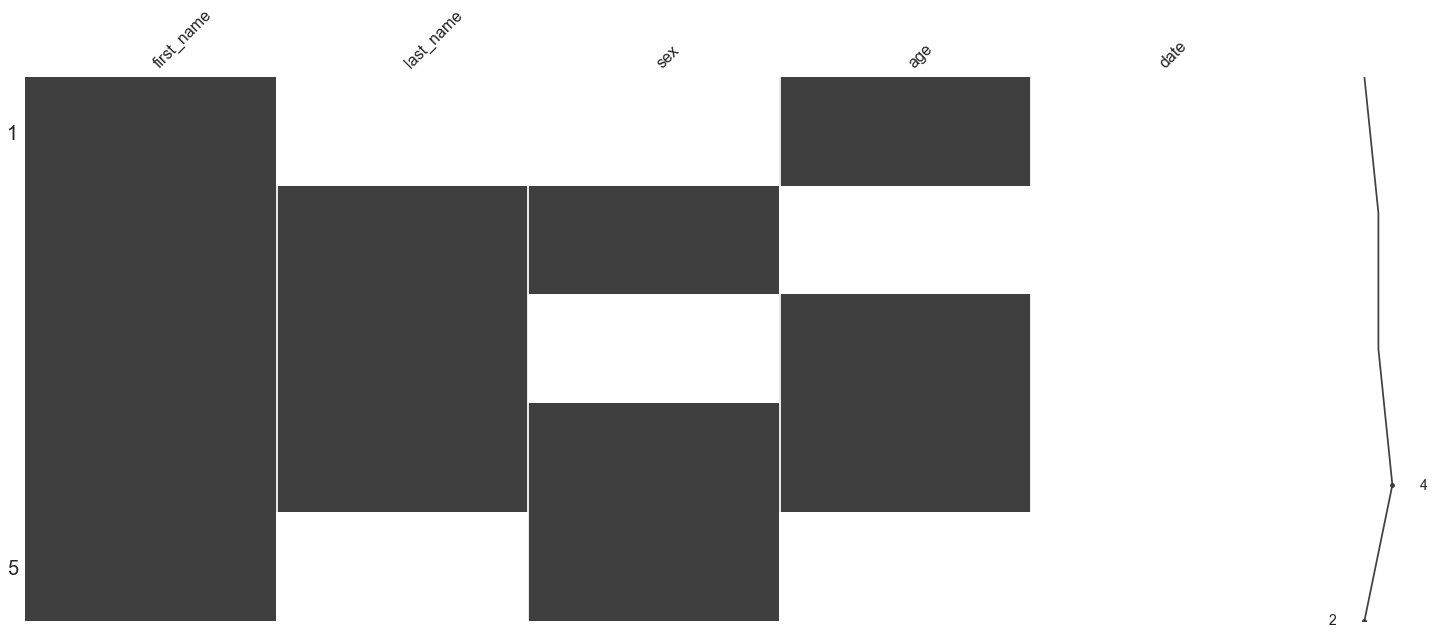

In [3]:
msno.matrix(df.sample(5))

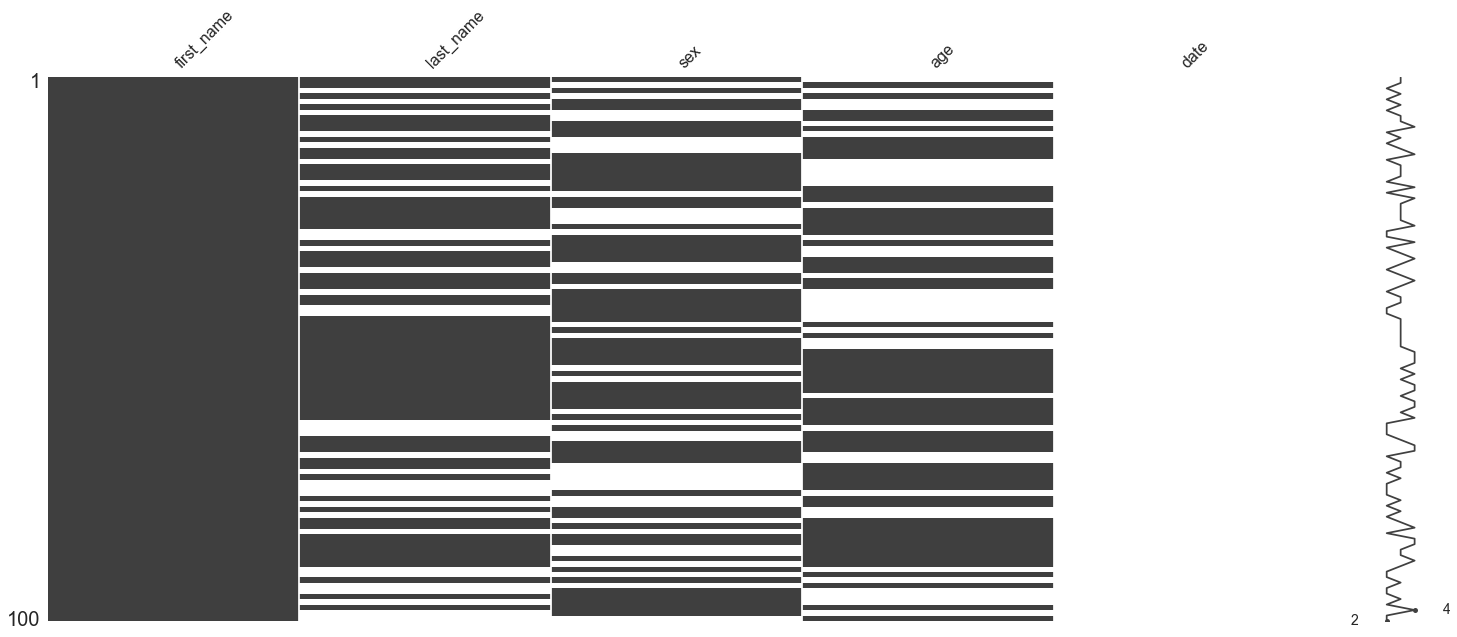

In [4]:
msno.matrix(df.sample(100, replace=True))

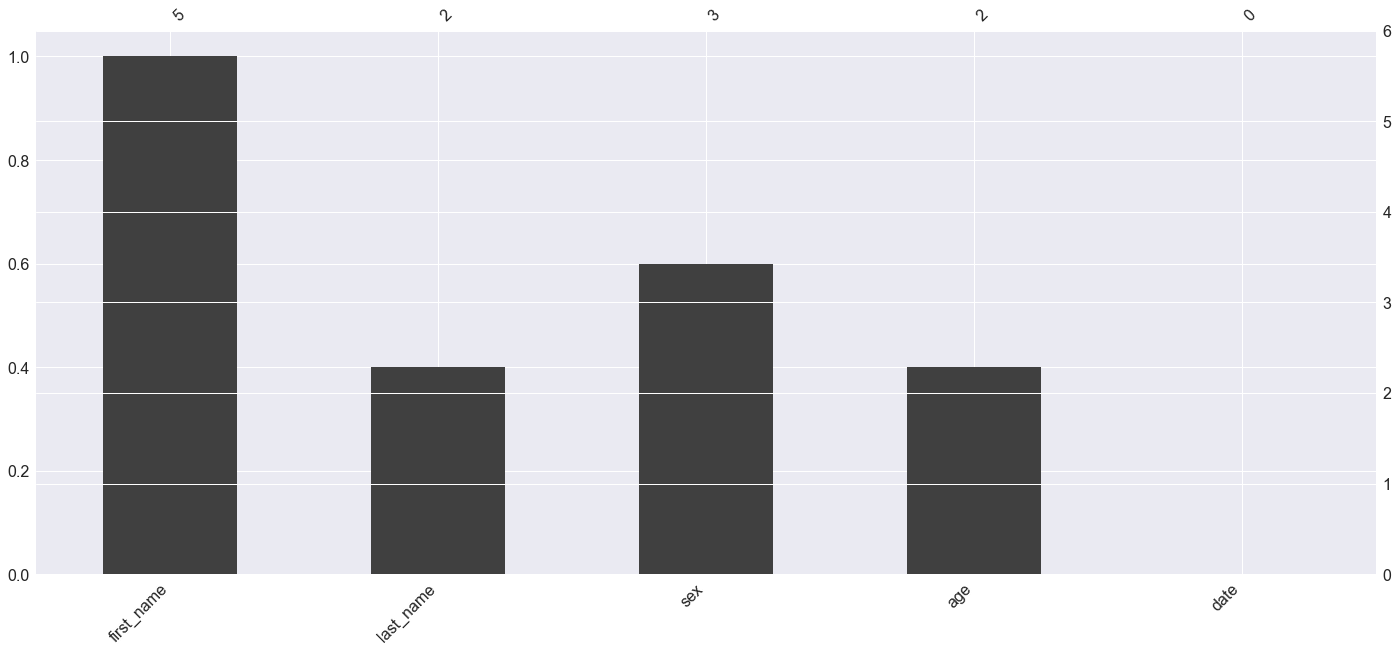

In [5]:
msno.bar(df.sample(5, replace=True))